In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install vaderSentiment
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/Combined_News_DJIA.csv')

In [ ]:
data


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

#Text Mining - Preprocessing

In [ ]:
len(data.index)

1989

In [ ]:
headlines = []
for row in range(0,len(data.index)):
  headlines.append(' '.join(str(x) for x in data.iloc[row,2:27]))

In [ ]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [ ]:
clean_headlines=[]
for i in range(0,len(headlines)):
    clean_headlines.append(re.sub("b[(')]",'',headlines[i])) #remove b'
    clean_headlines[i]=re.sub('b[(")]','',clean_headlines[i]) #remove b"
    clean_headlines[i]=re.sub("\'",'',clean_headlines[i]) #remove \'

In [ ]:
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [ ]:
data['combined_news'] = clean_headlines

In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
data['subjectivity'] = data['combined_news'].apply(get_subjectivity)
data['polarity'] = data['combined_news'].apply(get_polarity)


In [ ]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [ ]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(data['combined_news'])):
    SIA= getSIA(data['combined_news'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [ ]:
data['compound']= compound
data['neg']= neg
data['pos']=pos
data['neu']=neu

In [ ]:
data

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,combined_news,subjectivity,polarity,compound,neg,pos,neu
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,"Economists predict UK recession, further weake...","New EU 'superstate plan by F

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/sentiment_updated_data.csv',index=False)

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/SnP.csv')

In [ ]:
df

,Date,Close S&P,Close Dow,Close Gold,Close Crude,Unnamed: 5,Label
0,08-08-2008,1296.32,11734.32031,857.799988,114.62,NaN,0
1,11-08-2008,1305.32,11782.34961,821.5,112.72,9.00,1
2,12-08-2008,1289.59,11642.46973,808.200012,112.31,-15.73,0
3,13-08-2008,1285.83,11532.95996,825,112.87,-3.76,0
4,14-08-2008,1292.93,11615.92969,808.200012,112.59,7.10,1
...,...,...,...,...,...,...,...
1984,27-06-2016,2000.54,17140.24023,1322.5,45.83,-36.87,0
1985,28-06-2016,2036.09,17409.72070,1315.300049,46.54,35.55,1
1986,29-06-2016,2070.77,17694.67969,1323.900024,47.98,34.68,1
1987,30-06-2016,2098.86,17929.99023,1318.400024,48.17,28.09,1


In [ ]:
df.drop('Unnamed: 5',axis = 1,inplace = True)
df['Label'].sum()

1080

In [ ]:
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%d-%m-%Y')

In [ ]:
data

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,combined_news,subjectivity,polarity,compound,neg,pos,neu
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,27-06-2016,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,"Economists predict UK recession, further weake...","New EU 'superstate plan by F

In [ ]:
merge = pd.merge(df,data, how = 'left', on = 'Date')
merge

,Date,Close S&P,Close Dow,Close Gold,Close Crude,Label_x,Label_y,Top1,Top2,Top3,...,Top23,Top24,Top25,combined_news,subjectivity,polarity,compound,neg,pos,neu
0,08-08-2008,1296.32,11734.32031,857.799988,114.62,0,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11-08-2008,1305.32,11782.34961,821.5,112.72,1,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,12-08-2008,1289.59,11642.46973,808.200012,112.31,0,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,13-08-2008,1285.83,11532.95996,825,112.87,0,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,14-08-2008,1292.93,11615.92969,808.200012,112.59,1,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,27-06-2016,2000.54,17140.24023,1322.5,45.83,0,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,...,"Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,Barclays and RBS shares suspended from trading...,0.352311,-0.014015,-0.9644,0.148,0.094,0.758
1985,28-06-2016,2036.09,17409.72070,1315.300049,46.54,1,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,...,Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,"2,500 Scientists To Australia: If You Want To ...",0.352649,0.046560,-0.9571,0.132,0.102,0.767
1986,29-06-2016,2070.77,17694.67969,1323.900024,47.98,1,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,Explosion At Airport In Istanbul Yemeni former...,0.389617,0.052622,-0.9975,0.225,0.091,0.684
1987,30-06-2016,2098.86,17929.99023,1318.400024,48.17,1,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,.

In [ ]:
merge['Label_x'].sum()
merge['Label_y'].sum()

1065

In [ ]:
merge.drop('Label_y',axis=1,inplace=True)

In [ ]:
merge

,Date,Close S&P,Close Dow,Close Gold,Close Crude,Label_x,Top1,Top2,Top3,Top4,...,Top23,Top24,Top25,combined_news,subjectivity,polarity,compound,neg,pos,neu
0,08-08-2008,1296.32,11734.32031,857.799988,114.62,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11-08-2008,1305.32,11782.34961,821.5,112.72,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,12-08-2008,1289.59,11642.46973,808.200012,112.31,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,13-08-2008,1285.83,11532.95996,825,112.87,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,14-08-2008,1292.93,11615.92969,808.200012,112.59,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,27-06-2016,2000.54,17140.24023,1322.5,45.83,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...",...,"Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,Barclays and RBS shares suspended from trading...,0.352311,-0.014015,-0.9644,0.148,0.094,0.758
1985,28-06-2016,2036.09,17409.72070,1315.300049,46.54,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,...,Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,"2,500 Scientists To Australia: If You Want To ...",0.352649,0.046560,-0.9571,0.132,0.102,0.767
1986,29-06-2016,2070.77,17694.67969,1323.900024,47.98,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corby

In [ ]:
merge.columns.values

array(['Date', 'Close S&P', 'Close Dow', 'Close Gold', 'Close Crude',
       'Label_x', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14',
       'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25', 'combined_news',
       'subjectivity', 'polarity', 'compound', 'neg', 'pos', 'neu'],
      dtype=object)

In [ ]:
merge.drop(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14',
       'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],axis=1,inplace=True)

#Processed data to be used for Modeling

In [ ]:
merge

,Date,Close S&P,Close Dow,Close Gold,Close Crude,Label_x,combined_news,subjectivity,polarity,compound,neg,pos,neu
0,08-08-2008,1296.32,11734.32031,857.799988,114.62,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11-08-2008,1305.32,11782.34961,821.5,112.72,1,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,12-08-2008,1289.59,11642.46973,808.200012,112.31,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,13-08-2008,1285.83,11532.95996,825,112.87,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,14-08-2008,1292.93,11615.92969,808.200012,112.59,1,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,27-06-2016,2000.54,17140.24023,1322.5,45.83,0,Barclays and RBS shares suspended from trading...,0.352311,-0.014015,-0.9644,0.148,0.094,0.758
1985,28-06-2016,2036.09,17409.72070,1315.300049,46.54,1,"2,500 Scientists To Australia: If You Want To ...",0.352649,0.046560,-0.9571,0.132,0.102,0.767
1986,29-06-2016,2070.77,17694.67969,1323.900024,47.98,1,Explosion At Airport In Istanbul Yemeni former...,0.389617,0.052622,-0.9975,0.225,0.091,0.684
1987,30-06-2016,2098.86,17929.99023,1318.400024,48.17,1,Jamaica proposes marijuana dispensers for tour...,0.382566,0.011243,-0.9977,0.202,0.061,0.738


In [ ]:
merge.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/snp_merged_data.csv',index = False)

In [ ]:
merge.columns.values

array(['Date', 'Close S&P', 'Close Dow', 'Close Gold', 'Close Crude',
       'Label_x', 'combined_news', 'subjectivity', 'polarity', 'compound',
       'neg', 'pos', 'neu'], dtype=object)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/SnP_merged_new.csv')
df

,Date,Close S&P,percentage_change,Label,Close Dow,Close Gold,Close Crude,subjectivity,polarity,compound,neg,pos,neu
0,8/8/2008,1296.32,0.00,0,11734.32031,857.799988,114.62,0.254960,-0.047536,-0.9972,0.286,0.066,0.648
1,11/8/2008,1305.32,0.69,1,11782.34961,821.5,112.72,0.346443,0.113565,-0.9895,0.283,0.103,0.614
2,12/8/2008,1289.59,-1.21,0,11642.46973,808.200012,112.31,0.531229,-0.036307,-0.9942,0.263,0.093,0.645
3,13-08-2008,1285.83,-0.29,0,11532.95996,825,112.87,0.335034,0.014531,-0.9758,0.196,0.093,0.711
4,14-08-2008,1292.93,0.55,1,11615.92969,808.200012,112.59,0.328388,0.024498,-0.9883,0.252,0.118,0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,27-06-2016,2000.54,-1.81,0,17140.24023,1322.5,45.83,0.349394,-0.006098,-0.9839,0.218,0.117,0.665
1985,28-06-2016,2036.09,1.78,1,17409.72070,1315.300049,46.54,0.329909,0.039465,-0.9450,0.171,0.142,0.687
1986,29-06-2016,2070.77,1.70,1,17694.67969,1323.900024,47.98,0.387107,0.050125,-0.9943,0.259,0.123,0.618
1987,30-06-2016,2098.86,1.36,1,17929.99023,1318.400024,48.17,0.377540,0.018968,-0.9982,0.293,0.086,0.621


#Data Exploration

In [ ]:
corr_var = df[['Close S&P','Close Gold','Close Crude','subjectivity','polarity','neg','pos','neu','percentage_change','Label']]
corr_var.corr()

<ipython-input-32-2c7b807d321e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_var.corr()


,Close S&P,Close Crude,subjectivity,polarity,neg,pos,neu,percentage_change,Label
Close S&P,1.000000,-0.139699,-0.089480,0.083560,-0.295453,-0.091932,0.349867,0.021728,-0.001081
Close Crude,-0.139699,1.000000,-0.026718,-0.017347,0.017618,-0.008145,-0.012643,0.008719,0.047556
subjectivity,-0.089480,-0.026718,1.000000,0.020503,0.033412,0.166898,-0.133196,-0.026381,-0.028657
polarity,0.083560,-0.017347,0.020503,1.000000,-0.287767,0.328168,0.091032,0.029922,0.000843
neg,-0.295453,0.017618,0.033412,-0.287767,1.000000,-0.299231,-0.820339,0.027128,0.026896
pos,-0.091932,-0.008145,0.166898,0.328168,-0.299231,1.000000,-0.300104,-0.013002,-0.023214
neu,0.349867,-0.012643,-0.133196,0.091032,-0.820339,-0.300104,1.000000,-0.019610,-0.013122
percentage_change,0.021728,0.008719,-0.026381,0.029922,0.027128,-0.013002,-0.019610,1.000000,0.635567
Label,-0.001081,0.047556,-0.028657,0.000843,0.026896,-0.023214,-0.013122,0.635567,1.000000


<ipython-input-35-55f511b8d9f8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = corr_var.corr()


<Axes: >

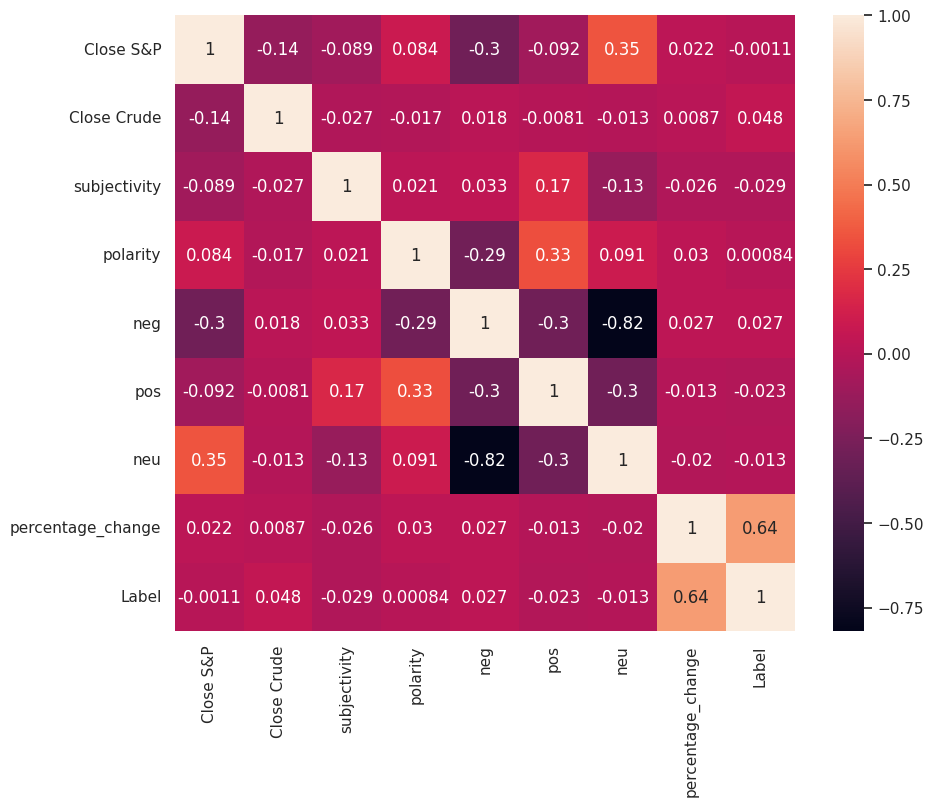

In [ ]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.0)  # set font size
plt.figure(figsize=(10, 8))
correlation = corr_var.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

#Predictive Modeling - Classification

In [ ]:
X=df[['subjectivity', 'polarity', 'neg', 'pos']]
y = df.Label

In [ ]:
X

,subjectivity,polarity,neg,pos
0,0.254960,-0.047536,0.286,0.066
1,0.346443,0.113565,0.283,0.103
2,0.531229,-0.036307,0.263,0.093
3,0.335034,0.014531,0.196,0.093
4,0.328388,0.024498,0.252,0.118
...,...,...,...,...
1984,0.349394,-0.006098,0.218,0.117
1985,0.329909,0.039465,0.171,0.142
1986,0.387107,0.050125,0.259,0.123
1987,0.377540,0.018968,0.293,0.086


In [ ]:
y.value_counts()

1    1080
0     909
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape)

(1591, 4) (398, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the preprocessed data
model = lda.fit(X_train_std, y_train)

In [ ]:
y_pred = lda.predict(X_test_std)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.52


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  2 185]
 [  6 205]]
              precision    recall  f1-score   support

           0       0.25      0.01      0.02       187
           1       0.53      0.97      0.68       211

    accuracy                           0.52       398
   macro avg       0.39      0.49      0.35       398
weighted avg       0.40      0.52      0.37       398



AUC: 0.47507413133284326


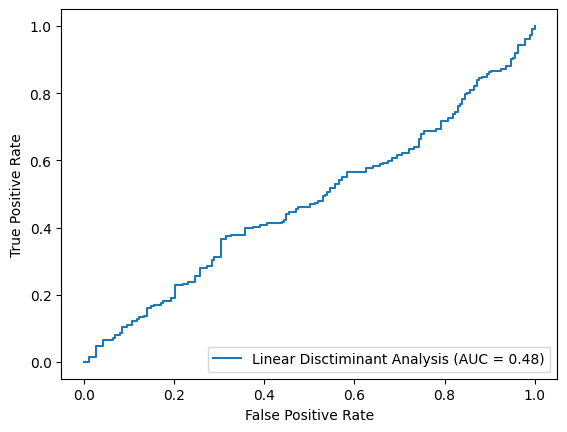

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = lda.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)


# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Linear Disctiminant Analysis')
roc_display.plot()
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.52


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  2 185]
 [  6 205]]
              precision    recall  f1-score   support

           0       0.25      0.01      0.02       187
           1       0.53      0.97      0.68       211

    accuracy                           0.52       398
   macro avg       0.39      0.49      0.35       398
weighted avg       0.40      0.52      0.37       398



AUC: 0.47512481942367635


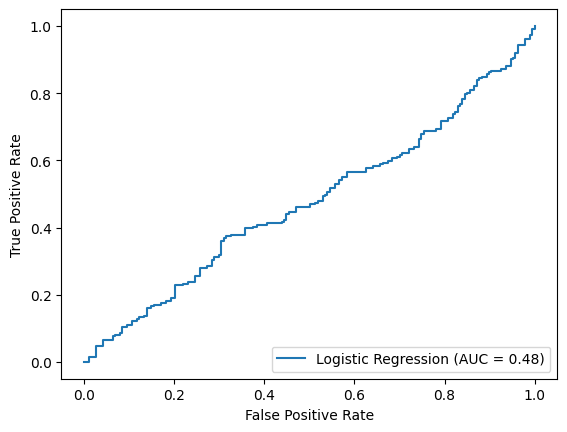

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = lr.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dt.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.48


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 82 105]
 [102 109]]
              precision    recall  f1-score   support

           0       0.45      0.44      0.44       187
           1       0.51      0.52      0.51       211

    accuracy                           0.48       398
   macro avg       0.48      0.48      0.48       398
weighted avg       0.48      0.48      0.48       398



AUC: 0.477545175760955


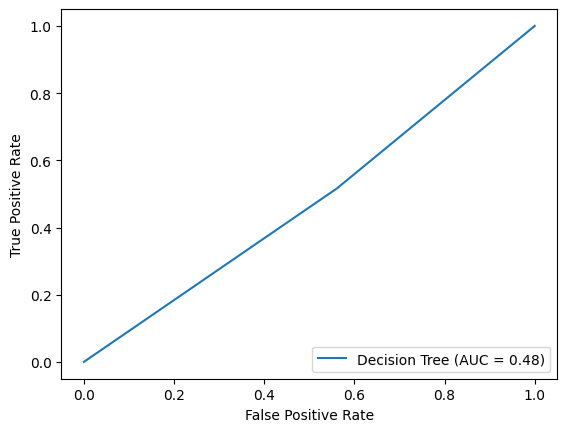

In [ ]:
y_pred_proba = dt.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Decision Tree')
roc_display.plot()
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train_std, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.47


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 62 125]
 [ 84 127]]
              precision    recall  f1-score   support

           0       0.42      0.33      0.37       187
           1       0.50      0.60      0.55       211

    accuracy                           0.47       398
   macro avg       0.46      0.47      0.46       398
weighted avg       0.47      0.47      0.47       398



AUC: 0.46437894416706793


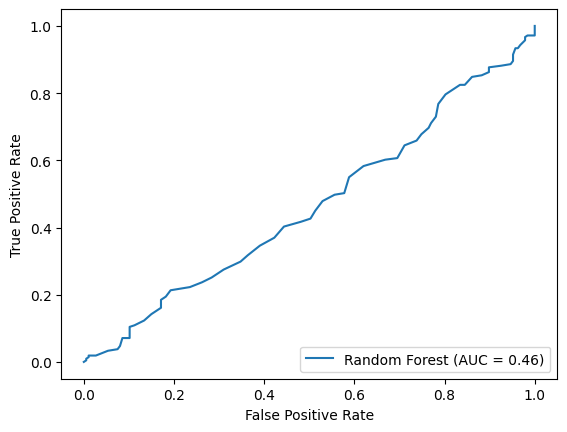

In [ ]:
y_pred_proba = rfc.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Random Forest')
roc_display.plot()
plt.show()

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_std, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
y_pred = gb.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.50


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 53 134]
 [ 65 146]]
              precision    recall  f1-score   support

           0       0.45      0.28      0.35       187
           1       0.52      0.69      0.59       211

    accuracy                           0.50       398
   macro avg       0.49      0.49      0.47       398
weighted avg       0.49      0.50      0.48       398



0.5

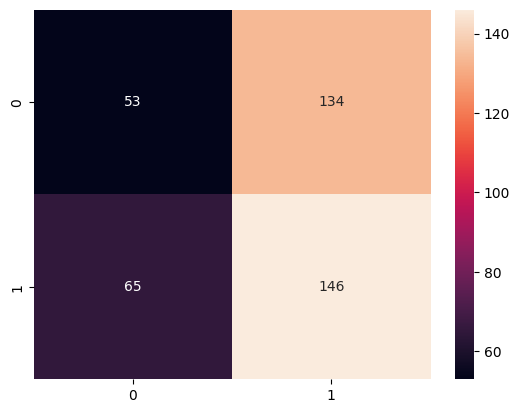

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy_score(y_test, y_pred)

AUC: 0.47473198671972017


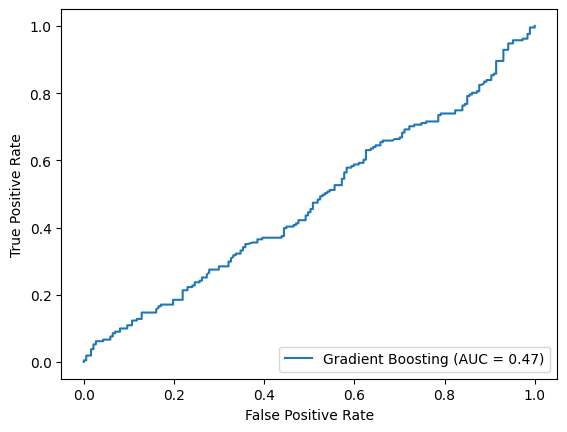

In [ ]:
y_pred_proba = gb.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Gradient Boosting')
roc_display.plot()
plt.show()